# STOCK PRICE PREDICTION
The purpose of this projects is to predict the closing price of the a stock given severable independent variables 

### Importing Libraries

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression     

### Loading the DataSet

In [35]:
df = pd.read_excel("Stock Price Prediction.xlsx")

In [36]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [37]:
#Checking for null values 
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

We don't have any null values which means we don't need any imputations strategy 

We should also check wheter the Date columns is a datetime data Type 

In [38]:
df.shape

(1009, 7)

In [39]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [40]:
df["Date"].dtype

dtype('<M8[ns]')

So our Date column is of Date Time and hence we don't need to convert it

## Exploratory Data Analsis 
Using visualization is a very effecient way to get insights from a data set. 

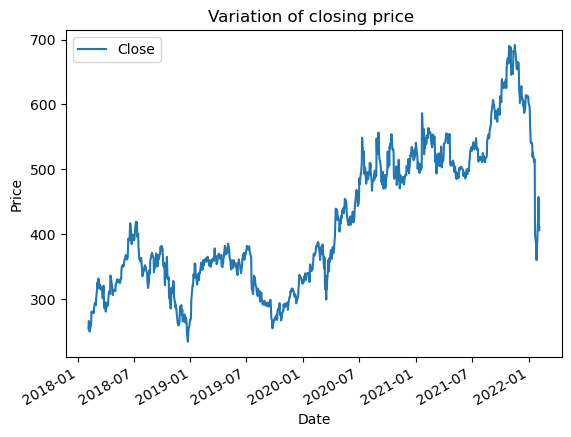

In [42]:
#Plotting the Closing values of stock over the entirirty of Dataframe
df.plot(x="Date",y="Close")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Variation of closing price ");

# Modelling

Let us start by building the most basic linear model called 'Linear Regression' 

## Linear Regression

The most basic machine learning algorithm that can be implemented on this data is linear regression. The linear regression model returns an equation that determines the relationship between the independent variables and the dependent variable.ights

In [46]:
#Setting the index as date 
df.index = df["Date"]

In [49]:
#We also need additional features for a good linear regression model , we can use a library called fastAi 

dtype('<M8[ns]')

### Implementation
We will first sort the dataset in ascending order and then create a separate dataset so that any new feature created does not affect the original data.

In [50]:
data = df.sort_index(ascending=True, axis=0)

In [51]:
# Creating a new data Frame
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

In [53]:
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
    

In [54]:
new_data.head()

,Date,Close
0,2018-02-05 00:00:00,254.259995
1,2018-02-06 00:00:00,265.720001
2,2018-02-07 00:00:00,264.559998
3,2018-02-08 00:00:00,250.100006
4,2018-02-09 00:00:00,249.470001


We also need to create addtional features from the date dataset . We can either do it manually or use a library called fastai

In [59]:
from fastai.tabular.all import *
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

This will add new features in our dataset like Month , week , Day etc 

In [60]:
new_data.head()

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,254.259995,2018,2,6,5,0,36,False,False,False,False,False,False
1,265.720001,2018,2,6,6,1,37,False,False,False,False,False,False
2,264.559998,2018,2,6,7,2,38,False,False,False,False,False,False
3,250.100006,2018,2,6,8,3,39,False,False,False,False,False,False
4,249.470001,2018,2,6,9,4,40,False,False,False,False,False,False


### Splitting the data and Implementing Linear Regression 
We can't split data randomly as it will break the timeseries and hence we need to split data sequentially

In [68]:
train = new_data[:987]   #70-30% in Trainign -Testing Respectiely
valid = new_data[987:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [69]:
#Predicting 
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

137.64632633672042

we have an RMS of 137 which is very high and it proves that Linear Models are not very effective for Stock Data 

### Conclusion

Linear regression is a simple technique and quite easy to interpret, but there are a few obvious disadvantages. One problem in using regression algorithms is that the model overfits to the date and month column. Instead of taking into account the previous values from the point of prediction, the model will consider the value from the same date a month ago, or the same date/month a year ago.

# LSTM

Next We will use the Long Short-Term Memory(LSTM) method to create a Machine Learning model to forecast Microsoft Corporation stock values. They are used to make minor changes to the information by multiplying and adding. Long-term memory (LSTM) is a deep learning artificial recurrent neural network (RNN) architecture.

Unlike traditional feed-forward neural networks, LSTM has feedback connections. It can handle single data points (such as pictures) as well as full data sequences (such as speech or video

LSTM too is widely used for forecasting of stock prices).

In [51]:
#Importing Libraries 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [52]:
df = pd.read_excel("Stock Price Prediction.xlsx")

In [53]:
#Setting date as index 
df.index=df["Date"]

In [29]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2018-02-05,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


### Splitting the data into training and testing sets

In [54]:
df_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])             #70% used as a training data
df_test = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])   #30% used as a testing data

print(df_train.shape)
print(df_test.shape)


(706, 1)
(303, 1)


In [55]:
df_test.head()

,Close
Date,
2020-11-23,476.619995
2020-11-24,482.880005
2020-11-25,485.000000
2020-11-27,491.359985
2020-11-30,490.700012


In [32]:
df_train.head()

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001


### Scaling

To decrease the computational cost of the data in the table, we will scale the stock values to values between 0 and 1. As a result, all of the data in large numbers is reduced, and therefore memory consumption is decreased. Also, because the data is not spread out in huge values, we can achieve greater precision by scaling down. To perform this, we will be using the MinMaxScaler class of the sci-kit-learn library.

In [56]:
scaler = MinMaxScaler()
df_train_array = scaler.fit_transform(df_train)


### Preparing the Data for LSTM 


In [57]:
# Preparing the training data

X_train = []
y_train = []

for i in range(100,df_train_array.shape[0]):
    X_train.append(df_train_array[i-100:i])
    y_train.append(df_train_array[i,0])
    
X_train,y_train = np.array(X_train),np.array(y_train)

Once the training and test sets are finalized, we will input the data into the LSTM model. Before we can do that, we must transform the training and test set data into a format that the LSTM model can interpret. As the LSTM needs that the data to be provided in the 3D form, we first transform the training and test data to NumPy arrays and then restructure them to match the format (Number of Samples, 1, Number of Features). Now, 6667 are the number of samples in the training set, which is 90% of 7334, and the number of features is 4. Therefore, the training set is reshaped to reflect this (6667, 1, 4).

### Building the Model 

we’ll build a Sequential Keras model with one LSTM layer. The LSTM layer has 32 units and is followed by one Dense Layer of one neuron.

We compile the model using Adam Optimizer and the Mean Squared Error as the loss function. For an LSTM model, this is the most preferred combination.

In [58]:
model = Sequential()

model.add(LSTM(units=50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_11 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_12 (LSTM)              (None, 120)              

In [60]:
# Compiling & fitting the model 
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
hist = model.fit(X_train,y_train, epochs = 50, batch_size = 32, verbose = 2 )

Epoch 1/50
19/19 - 14s - loss: 0.1234 - 14s/epoch - 738ms/step
Epoch 2/50
19/19 - 5s - loss: 0.0296 - 5s/epoch - 274ms/step
Epoch 3/50
19/19 - 5s - loss: 0.0195 - 5s/epoch - 254ms/step
Epoch 4/50
19/19 - 5s - loss: 0.0176 - 5s/epoch - 263ms/step
Epoch 5/50
19/19 - 6s - loss: 0.0174 - 6s/epoch - 321ms/step
Epoch 6/50
19/19 - 6s - loss: 0.0156 - 6s/epoch - 292ms/step
Epoch 7/50
19/19 - 6s - loss: 0.0169 - 6s/epoch - 301ms/step
Epoch 8/50
19/19 - 6s - loss: 0.0165 - 6s/epoch - 318ms/step
Epoch 9/50
19/19 - 5s - loss: 0.0157 - 5s/epoch - 278ms/step
Epoch 10/50
19/19 - 5s - loss: 0.0124 - 5s/epoch - 284ms/step
Epoch 11/50
19/19 - 5s - loss: 0.0145 - 5s/epoch - 270ms/step
Epoch 12/50
19/19 - 5s - loss: 0.0147 - 5s/epoch - 269ms/step
Epoch 13/50
19/19 - 5s - loss: 0.0125 - 5s/epoch - 274ms/step
Epoch 14/50
19/19 - 5s - loss: 0.0128 - 5s/epoch - 269ms/step
Epoch 15/50
19/19 - 5s - loss: 0.0124 - 5s/epoch - 251ms/step
Epoch 16/50
19/19 - 5s - loss: 0.0120 - 5s/epoch - 247ms/step
Epoch 17/50
19/

### Prediction 

For prediction, we need testing data and if we look the test data from above table. We can say that we need previous days data for prediction. Hence, for prediction append the 'df_train.tail() to df_test.head()' 


In [63]:
past_100_days = df_train.tail(100)
final_df = past_100_days.append(df_test, ignore_index=True)


C:\Users\rajni\AppData\Local\Temp\ipykernel_17364\2266614119.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(df_test, ignore_index=True)


In [65]:
# Scaling the data
input_data = scaler.fit_transform(final_df)

In [66]:
# Preparing the testing data
X_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    X_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    
X_test,y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)
print(y_test.shape)

(303, 100, 1)
(303,)


In [67]:
# Making Predictions

y_pred = model.predict(X_test)
print(y_pred.shape)

(303, 1)


In [68]:
# Scaling the data again so that  the predicted and true values match in scale
scaler.scale_
scale_factor = 1/0.00301214
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

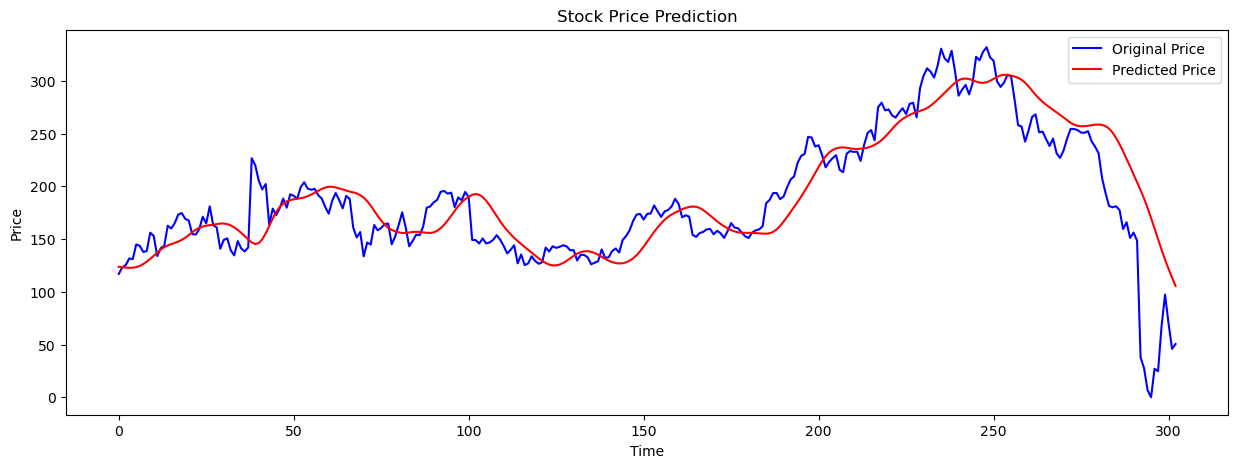

In [69]:
plt.figure(figsize = (15,5))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_pred,'r',label = 'Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [70]:
mae = mean_absolute_error(y_test,y_pred)

In [71]:
mae

22.227996622001395

### Conclusion
With an MAE of 22.22 and the graphh that almost follow the trend , we can conclude that our LSTM model performed much better at predicting the trend of closing price of the stock than our Linear Regression model. 